# Wine dataset
Predict the quality of the wine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()
#to find if there is any missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.quality.unique()
#finding different values of the quality and then grouping it

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
corr_matrix=df.corr()

In [8]:
corr_matrix["quality"].sort_values(ascending=False)
#this will help tp find which attributs to consider for the quality

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

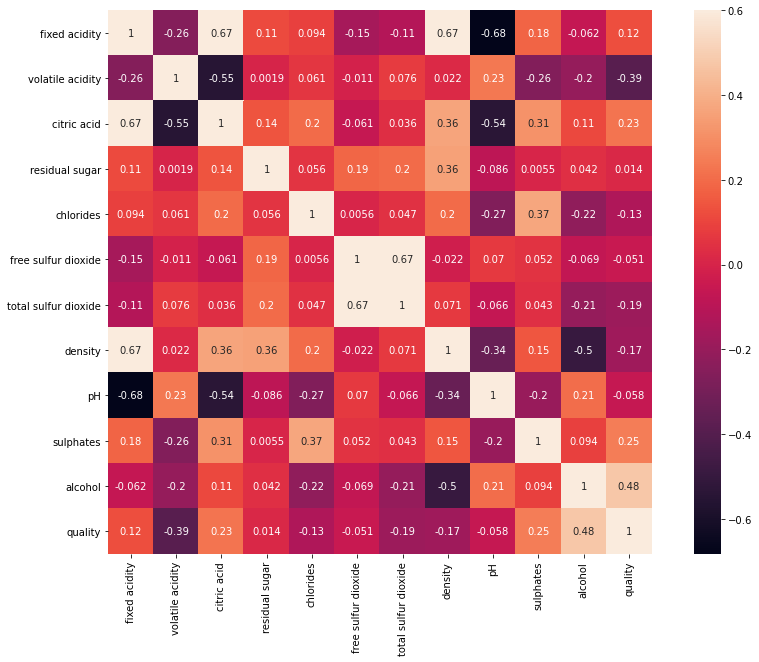

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

In [10]:
#dropping columns 
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
#converting the quality into good and bad group

In [11]:
df.quality.value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [12]:
from sklearn.preprocessing import  LabelEncoder

label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
#encoding it intogood and bad where good=1 and bad=0

In [13]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [14]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
print(np.where(z>3))
#finding ouliers

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [15]:
df =df[(z < 3).all(axis=1)]

In [16]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [17]:
X.shape

(1458, 11)

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr=lr.predict(X_test)
print("Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))


Test Accuracy: 89.38%


C:\Users\Preeti kumari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
rfc_eval = cross_val_score(estimator = lr, X= X_train ,y = y_train, cv = 10,scoring="accuracy")
rfc_eval.mean()

C:\Users\Preeti kumari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Preeti kumari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.8816460359563807

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print("Test Accuracy: {}%".format(round(model1.score(X_test,y_test)*100,2)))





Test Accuracy: 85.62%


In [21]:
rfc_eval = cross_val_score(estimator = model1, X= X_train ,y = y_train, cv = 10,scoring="accuracy")
rfc_eval.mean()

0.8833996463306809

In [22]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print("Test Accuracy: {}%".format(round(model1.score(X_test,y_test)*100,2)))




#Random test classifier is better than Decision tree


Test Accuracy: 85.62%


In [23]:
rfc_eval = cross_val_score(estimator = model2, X= X_train ,y = y_train, cv = 10,scoring="accuracy")
rfc_eval.mean()

0.9168213969938108

In [29]:
#Choosing random forest classifier and printing the confusion and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred2))
print("classification report \n",classification_report(y_test,y_pred2))


Confusion matrix 
 [[251   7]
 [ 21  13]]
classification report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       258
           1       0.65      0.38      0.48        34

    accuracy                           0.90       292
   macro avg       0.79      0.68      0.71       292
weighted avg       0.89      0.90      0.89       292



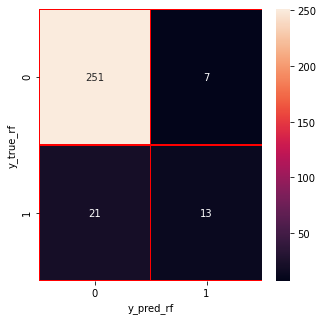

In [30]:
y_pred_rf = model2.predict(X_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()